In [1]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Dense

import matplotlib.pyplot as plt
%matplotlib inline

**Loading and processing of input data**

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

#normalisation dataset (Train & Test)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape dataset (Train & Test)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

#create a dataset  with noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


**Visualization of Data**

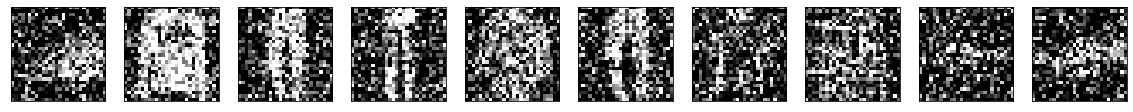

In [3]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Defining the AutoEncoder Model**

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoiser_mlp = Model(input_img, decoded)
denoiser_mlp.compile(optimizer='adam', loss='binary_crossentropy')
denoiser_mlp.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)              

**Training the Denoiser**

In [5]:
 history_den_mlp = denoiser_mlp.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/200
235/235 [==============================] - 1s 4ms/step - loss: 0.4080 - val_loss: 0.3514
Epoch 2/200
235/235 [==============================] - 1s 4ms/step - loss: 0.3338 - val_loss: 0.3261
Epoch 3/200
235/235 [==============================] - 1s 4ms/step - loss: 0.3197 - val_loss: 0.3201
Epoch 4/200
235/235 [==============================] - 1s 4ms/step - loss: 0.3152 - val_loss: 0.3177
Epoch 5/200
235/235 [==============================] - 1s 3ms/step - loss: 0.3120 - val_loss: 0.3149
Epoch 6/200
235/235 [==============================] - 1s 3ms/step - loss: 0.3098 - val_loss: 0.3114
Epoch 7/200
235/235 [==============================] - 1s 4ms/step - loss: 0.3080 - val_loss: 0.3123
Epoch 8/200
235/235 [==============================] - 1s 3ms/step - loss: 0.3065 - val_loss: 0.3094
Epoch 9/200
235/235 [==============================] - 1s 3ms/step - loss: 0.3053 - val_loss: 0.3079
Epoch 10/200
235/235 [==============================] - 1s 3ms/step - loss: 0.3042 - val_lo

**Plot the loss**

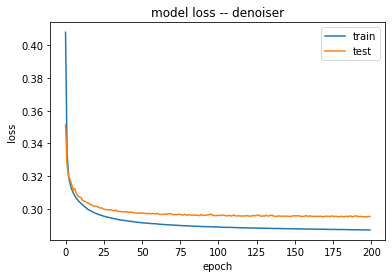

In [6]:
plt.plot(history_den_mlp.history['loss'])
plt.plot(history_den_mlp.history['val_loss'])
plt.title('model loss -- denoiser')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Testing of the model on noised data**

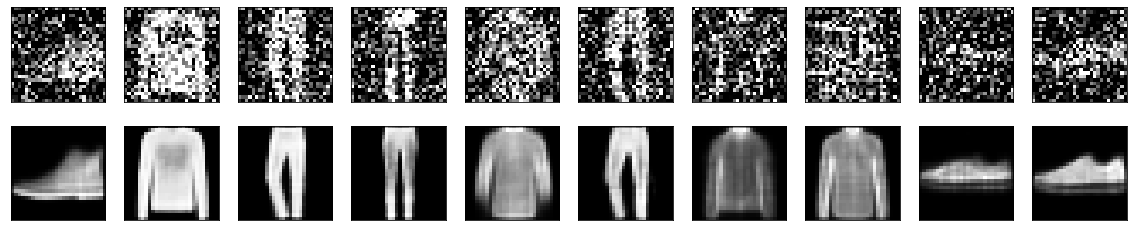

In [7]:
decoded_imgs = denoiser_mlp.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()